# NLE Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [ ]:
candidateno= #this MUST be updated to your candidate number so that you get a unique data sample


In [ ]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [ ]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def get_train_test_data():
    
    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')
   
    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]
   
    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [ ]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['i', 'must', 'admit', 'i', "'", 'm', 'going', 'to', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [ ]:
def freq_dist(data):
    freq_dist = FreqDist()
    for review, label in data:
        freq_dist += review
    return freq_dist

def most_frequent_words(freq_dist_1, freq_dist_2, k):
    diff = freq_dist_1 - freq_dist_2
    return list(dict(diff.most_common(k)).keys())

#def above_threshold(freq_dist_1, freq_dist_2, k):  sef ref (Note)  got this as part of my experiment not part if the question  
#    diff = freq_dist_1 - freq_dist_2
#    return [i for i, j in dict(diff.most_common()).items() if j > k]
    
def normalized_list(data, tag):
    if tag != '':
        words_norm = [([j for j in i[0] if j.isalpha() and j not in stopwords.words('english')], i[1]) for i in data if i[1] == tag]
        bag_of_words = [(FreqDist(i[0]), i[1]) for i in words_norm]
    else:
        words_norm = [([j for j in i[0] if j.isalpha() and j not in stopwords.words('english')], i[1]) for i in data]
        bag_of_words = [(FreqDist(i[0]), i[1]) for i in words_norm]
    return bag_of_words

In [ ]:
training_pos_freq = normalized_list(training_data, "pos")
training_neg_freq = normalized_list(training_data, "neg")

In [ ]:
pos_freq_dist = freq_dist(training_pos_freq)
neg_freq_dist = freq_dist(training_neg_freq)

In [ ]:
bag_of_training_pos = most_frequent_words(pos_freq_dist, neg_freq_dist, 10)
bag_of_training_neg = most_frequent_words(neg_freq_dist, pos_freq_dist, 10)

In [ ]:
print(f'10 content words which are representative of the positive reviews : \n{bag_of_training_pos}')

10 content words which are representative of the positive reviews : 
['film', 'life', 'also', 'best', 'story', 'great', 'well', 'world', 'one', 'many']


In [ ]:
print(f'10 content words which are representative of the negative reviews : \n{bag_of_training_neg}')

10 content words which are representative of the negative reviews : 
['movie', 'bad', 'plot', 'worst', 'nothing', 'stupid', 'even', 'boring', 'script', 'could']


Q1
c) Explain what you have done and why   (self ref ### Exercise 3.3)

As *training_data* cointains all the training sample these are either postive or negative.

training_pos = positve reviews

training_neg = negative reviews 

Many of the words in the representations of documents are punctuation and stopwords. This is because we haven't done any pre-processing of the wordlists.
To efficienlty procesess the data i have used the following pre-processing steps to word list, *Stopword Removal* and *lowering* of words  (#don't actually need this as already lowered) this is stored as training_pos_freq and training_neg_freg. 
Using *NLTKs FreqDisk* method we get frequency distribution of poistive and negative wordlist. throught the *most_frequent_words* function we get diffrences between *pos_freq_dist* and *neg_freq_dist* this returns the most frequent postive and neagtive words in our case it returns K which is 10 in our case.


To generate lists of 10 content words for negative and positive reviews from the training set, the training_data variable is used to generate positive content words which have labels as "pos" and negative content words which have labels as "neg". The dataset is then passed to the normalized_list(data, tag) with tags as "pos" and "neg" to generate respective lists. In order to obtain the representative content words, a frequency distribution for the respective training sets are created which are then passed through the function, above_threshold that gives us the difference between freq_dist_1 and freq_dist_2 (effectively creating a frequency distribution of first distribution with respect to the other). As mentioned in the question, only the 10 most representative words are needed from each list thus, the parameter k is set to 10 which returns the 10 most common words in the respective FreqDist


  - `most_frequent_words` - this function should take THREE arguments: 2 frequency distributions and a natural number, k. It should order words by how much more they occur in one frequency distribution than the other.   It should then return the top k highest scoring words. You might want to use the `most_common` method from the `FreqDist` class - this returns a list of word, frequency pairs ordered by frequency.  You might also or alternatively want to use pythons built-in `sorted` function
    - `words_above_threshold` - this function also takes three arguments: 2 frequency distributions and a natural number, k. Again, it should order words by how much more they occur in one distribution than the other.  It should return all of the words that have a score greater than k.


2) 
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [ ]:
class WordListClassifier(ClassifierI): 
  def __init__(self, pos, neg): 
        self._pos = pos 
        self._neg = neg 

  def classify(self, doc): 
        #doc is a FreqDist
        score = 0
        
        # add code here that assigns an appropriate value to score
        for word,value in doc.items():
            if word in self._pos:
                score+=value
            if word in self._neg:
                score-=value
        
        return "neg" if score < 0 else "pos" 

     ##we don't actually need to define the classify_many method as it is provided in ClassifierI
    #def classify_many(self, docs): 
    #    return [self.classify(doc) for doc in docs] 



In [ ]:
testing_norm = normalized_list(testing_data, '')
test_cases, labels = zip(*testing_norm)

In [ ]:
WLC = WordListClassifier(bag_of_training_pos, bag_of_training_neg)
pred = WLC.classify_many(test_cases)
WLC.classify(FreqDist("This movie was great".split()))
# pred = WLC.classify_many(test_cases)

'pos'

In [ ]:
WLC.classify(FreqDist("This movie was nothing".split()))

'neg'

In [ ]:
#pred = WLC.classify_many(test_cases)

(using lab 3.1 for self ref)
for class WordListClassifier will have two methods.
method _init_ this funtion passes two arguments which are positive FreqDist() items and negative FreqDist() items then stores it respectivly in _pos and _neg variables

classify this method is used to classify the FreqDist values which have been passed through by checking each word in the freqDist against the positive and negative FreqDist's which have been initialised previously. The following rules are used:

*   If the score variable is greater than 0, the document is classified as "pos"
*   If the score variable is less than 0, the document is classified as "neg".
*   If the score variable is equal to 0, a random choice is made using random.choice.


Each of the training_data samples are normalised and a frequency distribution of each is created. The test_cases variable contains all the frequency distribution of each sample and label contains their respective categories. The WordListClassifier is trained with the previously obtained bag_of_training_pos and bag_of_training_neg lists which contain positive and negative content words respectively.

Finally, classifications of all samples in test_case are made and their predicted labels are stored in variable pred




3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [ ]:
class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("pos","neg"), display = True):
    
        (self.c1,self.c2)=classes   #self.predictions=predictions
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1
        
            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1
        if display == True:
            print(f'True positive (tp) : {self.TP}\nFalse positive (fp) : {self.FP}\nTrue Negative (tn) : {self.TN}\nFalse negative (fn) : {self.FN}')
    
    def accuracy(self):       #put your code to compute accuracy here
        self.acc = 0
        self.acc = (self.TP+self.TN)/(self.TP+self.FP+self.FN+self.TN)
        return self.acc
    
    def precision(self):    #put your code to compute precision here
        self.p=0
        self.p = self.TP/(self.TP+self.FP)
        return self.p
  
    def recall(self):       #put your code to compute recall here
        self.r=0
        self.r = self.TP/(self.TP+self.FN)
        return self.r
  
    def f1_score(self):     #put your code to compute f1 here
        self.f1=0
        self.f1 = 2*self.p*self.r/(self.p+self.r)
        return self.f1 

In [ ]:
WLC_CM = ConfusionMatrix(pred, labels)

True positive (tp) : 274
False positive (fp) : 210
True Negative (tn) : 90
False negative (fn) : 26


In [ ]:
metrics_wordlist_classifier = {"Accuracy" : WLC_CM.accuracy(), "Precision" : WLC_CM.precision(), "Recall" : WLC_CM.recall(), "F1 score" : WLC_CM.f1_score()}
df1 = pd.DataFrame(metrics_wordlist_classifier, index = [0])
print("Performance metrics of the wordlist classifier : ")
display(df1)

Performance metrics of the wordlist classifier : 


,Accuracy,Precision,Recall,F1 score
0,0.606667,0.566116,0.913333,0.69898


3(b) using lab 3.2 exercise 2.1 for self ref
It is not possible to evaluate a classifier effectively by focusing simply on accuracy. Accuracy is not always reliable and be misleading.The further you get from 50/50, the more accuracy misleads. For instance, a model can predict the value of the majority class for all predictions and obtain a high classification accuracy in a problem with a significant class imbalance. Additional performance metrics, such as the F1 score and Brier score, are therefore required. So, further performance measures are needed such as F1 score, precistion Recall.

DataSet ; class balanced 

It works great if there are an equal number of samples for each class. For example, we have 90% sample of class A and 10% sample of class B in our training set. Then, our model will predict with the accuracy of 90% by predicting all the training samples belongs to class A.




DataSet ; class imbalanced 
Consider a dataset with a 99:1 split of negatives to positives. Simply guessing the majority class yields a 99% accurate classifier. Another example When classes are unbalanced, evaluating classifiers in terms of accuracy can be misleading.  For example, if 10% of documents are relevant and 90% of documents are irrelevant, then a classifier which labels all documents as irrelevant will obtain an accuracy of 90%.  This sounds good but is actually useless. More useful metrics for evaluation of performance are precision, recall and F1 score.  These metrics allow us to distinguish the different types of errors our classifiers make.


For each class, $c$, we need to keep a record of 
* True Positives: $TP=|\{i|\mbox{prediction}(i)=\mbox{label}(i)=c\}|$
* False Negatives: $FN=|\{i|\mbox{prediction}(i)\neq \mbox{label}(i)=c\}|$
* False Positives: $FP=|\{i|\mbox{label}(i) \neq \mbox{prediction}(i)=c\}|$
* True Negatives: $TN=|\{i|\mbox{prediction}(i)=\mbox{label}(i)\neq c\}|$

Note the symmetry in the binary classification task (the TN for one class are the TP for the other class and so on).  Therefore, in binary classification, we just record these values and compute the following evaluation metrics for a single class (e.g. "Relevant" or "Positive")

* Precision: 
\begin{eqnarray*}
P=\frac{TP}{TP+FP}
\end{eqnarray*}
* Recall: 
\begin{eqnarray*}
R=\frac{TP}{TP+FN}
\end{eqnarray*}
* F1-score: 
\begin{eqnarray*}
F1 = \frac{2\times P\times R}{P+R}
\end{eqnarray*}





4) 
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results. 

[12.5\%]

In [ ]:
nb_training_data = normalized_list(training_data, '')

In [ ]:
from nltk.classify import NaiveBayesClassifier

NLTK_NB = NaiveBayesClassifier.train(nb_training_data)

In [ ]:
NB_CM = ConfusionMatrix(NLTK_NB.classify_many(test_cases), labels ,classes=('pos','neg'))
metrics_NB_classifier = {"Accuracy" : NB_CM.accuracy(), "Precision" : NB_CM.precision(), "Recall" : NB_CM.recall(), "F1 score" : NB_CM.f1_score()}

print("Performance metrics of wordlist and Naive Nayes classifier : ")
df1 = df1.append(metrics_NB_classifier, True)
display(df1)

True positive (tp) : 291
False positive (fp) : 187
True Negative (tn) : 113
False negative (fn) : 9
Performance metrics of wordlist and Naive Nayes classifier : 


,Accuracy,Precision,Recall,F1 score
0,0.606667,0.566116,0.913333,0.698980
1,0.673333,0.608787,0.970000,0.748072


b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results. 

Naive Bayes Classifier appears to be a better classifier than my wordList classifier, producing higher accuraccy, precision, recall values and F1 score.

Performance metrics of the wordlist classifier : 

* There were an overall of 274 movie reviews which belonged to the positive class and were predicted positive Tp and 90 movie reviews belonged to the negative class and were predicted correctly Tn.
* An overall of 210 movie reviews belonged to negative class but were classified as positive Fp while, 26 movie reviews belonging to the positive class was classified as negative Fn.

*   Accuraccy                         = 0.606667


* Precision: 
\begin{eqnarray*}
P=\frac{TP}{TP+FP}                     =0.566116
\end{eqnarray*}
* Recall: 
\begin{eqnarray*}
R=\frac{TP}{TP+FN}                     = 0.913333
\end{eqnarray*}
* F1-score: 
\begin{eqnarray*}
F1 = \frac{2\times P\times R}{P+R}      = 0.698980
\end{eqnarray*}


Performance metrics of Nayes classifier :

*   Accuraccy                         = 0.673333


* Precision: 
\begin{eqnarray*}
P=\frac{TP}{TP+FP}                     =0.608787
\end{eqnarray*}
* Recall: 
\begin{eqnarray*}
R=\frac{TP}{TP+FN}                     = 0.970000
\end{eqnarray*}
* F1-score: 
\begin{eqnarray*}
F1 = \frac{2\times P\times R}{P+R}      = 0.748072
\end{eqnarray*}


* There were an overall of 291 movie reviews which belonged to the positive class and were predicted positive Tp and 113 movie reviews belonged to the negative class and were predicted correctly Tn.
* An overall of 187 movie reviews belonged to negative class but were classified as positive fp while, 9 movie reviews belonging to the positive class were classified as negative Fn.

conclusion 
All the metrices have diffrent values and scores.To be more specific, the Naive Bayes classifier predicted a higher number of positively labelled movie reviews than the Wordlist classifier. However, the Wordlist classifier was better at predicting negatively labelled movie reviews, but had a significantly higher total number of incorrectly predicted reviews. In terms of the above metrics, the Naive Bayes classifier outperformed the Wordlist classifier in terms of accuracy, precision, recall, and F1 score.


5) 
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions. 

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


In [ ]:
metrics = []
for i in range(10, 10000, 100):
    bag_of_training_pos_ = most_frequent_words(pos_freq_dist, neg_freq_dist, i)
    bag_of_training_neg_ = most_frequent_words(neg_freq_dist, pos_freq_dist, i)
    WLC_ = WordListClassifier(bag_of_training_pos_, bag_of_training_neg_)
    pred_ = WLC_.classify_many(test_cases)
    WLC_CM_ = ConfusionMatrix(pred_, labels, display = False)
    metrics.append([i, (WLC_CM_.accuracy(), WLC_CM_.precision(), WLC_CM_.recall(), WLC_CM_.f1_score())])

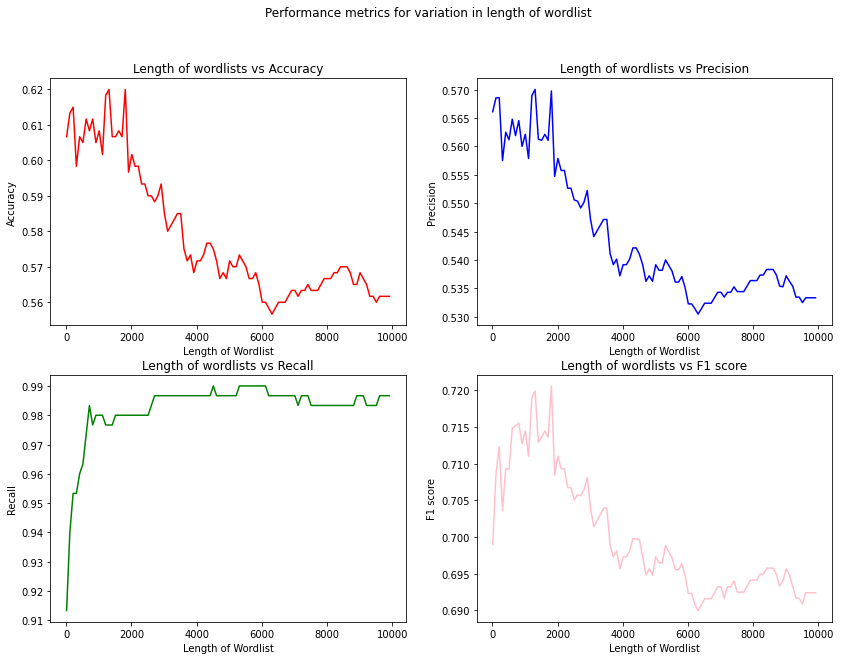

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (14, 10))
ax[0, 0].plot([i[0] for i in metrics], [i[1][0] for i in metrics], c = 'red')
ax[0, 0].set_title('Length of wordlists vs Accuracy')
ax[0, 0].set(xlabel = 'Length of Wordlist', ylabel = 'Accuracy')

ax[0, 1].plot([i[0] for i in metrics], [i[1][1] for i in metrics], c = 'blue')
ax[0, 1].set_title('Length of wordlists vs Precision')
ax[0, 1].set(xlabel = 'Length of Wordlist', ylabel = 'Precision')

ax[1, 0].plot([i[0] for i in metrics], [i[1][2] for i in metrics], c = 'green')
ax[1, 0].set_title('Length of wordlists vs Recall')
ax[1, 0].set(xlabel = 'Length of Wordlist', ylabel = 'Recall')

ax[1, 1].plot([i[0] for i in metrics], [i[1][3] for i in metrics], c = 'pink')
ax[1, 1].set_title('Length of wordlists vs F1 score')
ax[1, 1].set(xlabel = 'Length of Wordlist', ylabel = 'F1 score')

fig.suptitle('Performance metrics for variation in length of wordlist')
plt.show()


5) 
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions. 

**Ans 5 (a)
* From the above graphs, it can be seen that as the length of the wordlists increases, the classifier initially reaches a peak accuracy peak of almost 62%, after which the accuracy decreases. This is due to the fact that when the classifier is trained, the words of the two classes "pos" and "neg" overlap. When a larger number of frequent words are used in word list generation, the same words occur in different classes, which leads to ambiguity in predicting the output. For the same reason, the precision of the classifier also decreases (after it reaches its maximum value of 57%), as it is not able to make correct positive predictions for positively marked movie reviews 
* the recall of the classifier shows a steep increase at first, then rises slightly and remains quite stable at almost 98.5%.
* Since the classifier has medium-low precision and high recall, the F1 score is used to measure its performance. As with all other metrics, the F1 score shows a sharp increase until it peaks at almost 72%, after which it drops steeply to 69% and then drops to 68%. Although the F1 values do not show much change, the range of variation is only 3%/4%.
* Thus, determining the k most frequent words with which to train the classifier remains crucial and forms the backbone of the classifier. Ideally, the k value should be much smaller than the total size of the word list, since above a certain threshold, the words in both word lists start to influence each other and create ambiguity during classification. From the above diagrams, it can be seen that a k value of almost 100 would be very efficient for classification.



b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.
 
 
Intro 
Naïve Bayes is based on probability assuming relevance and wordlist is formed on frequency.


A wordlist classifier is a very basic classification technique that relies on the frequency of words in both negative and positive wordlists and fails to account for the relative number of words in relationship to a set of datasets, producing inaccurate metrices in many cases.

Naive Bayes 

pro

The Naïve Bayes algorithm quickly predicts the class of the test data set. Moreover, it also performs accurately in a multi-class prediction scenario.
Efficient, not biased by outliers, works on non – linear problems, probabilistic approach.

cons
Perform very poorly when features are highly
correlated

Based on the assumption that the features have same statistical relevance.


Conclution :

When we use an assumption of independence, a Naive Bayes classifier performs better than other models like WordList Classifer. It works with fewer training data too. Common applications of Naive Bayes algorithm are Google in Spam filtering of Gmail when reciving emails. Considering all the above I highly recommend Naïve Bayes Classifiers over my wordlist classifiers, while researching about different machine learning algorithms Classification, Naïve Bayes Algorithm is better than many other a classifier. It belongs to the supervised learning algorithm category and is a simple classification algorithm that improves the development of fast machine learning models capable of making quick predictions. As mentioned previously it predicts based on the probability of an object known as a probabilistic classifier.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437
## self ref (chicken 36) 

import io
from nbformat import current

filepath="/content/drive/My Drive/NLassignment2022.ipynb"
#filepath="NLassignment2022.ipynb"
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 1951
